# By - Samiksha Bhavsar

# USED CAR PREDICTION PRICE

<img src="https://www.marketingdonut.co.uk/sites/default/files/styles/landing_pages_lists/public/usedcardealer1.jpg?itok=lSSEdwpY">

# Problem definition


This is the first step of machine learning life cycle.Here we analyse what kind of problem is, how to solve it. 
So for this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using regression machine learning algorithms to solve this problem.

In [2]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [2]:
#I have used the raw link for the csv file from my github repositiory.
#url = 'https://raw.githubusercontent.com/SamikshaBhavsar/ML-end_to_end_project/main/car_price_project/car_dataset.csv'
#read this file with the help of pandas.

import pandas as pd
dataset = pd.read_csv("car_dataset.csv")

#if you have already downloaded the csv file into our project folder then use :
# dataset = pd.read_csv("car_dataset.csv")

#print first five rows of the dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
#checking no. of rows and columns in dataset
dataset.shape

(301, 9)

This dataset contains 301 rows and 9 columns

In [4]:
#Checking the data type of columns.
#this step is important because sometimes dataset may contain wrong datatype of the feature.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Good! every data type is correctly mentioned. We need not to make any changes.

In [5]:
#check statistical summary of all the columns with numerical values.
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#check if there is any missing value in the dataset
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the dataset

# Feature Engineering

In [7]:
#adding a column with the current year
dataset['Current_Year']=2020
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [8]:
#creating a new column which will be age of vehicles; new feature
dataset['Vehicle_Age']=dataset['Current_Year'] - dataset['Year']
dataset.head(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [9]:
#getting dummies for these columns with help of pandas library
dataset=pd.get_dummies(dataset,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the columns which are redundant and irrelevant
dataset.drop(columns=['Year'],inplace=True)
dataset.drop(columns=['Current_Year'],inplace=True)
dataset.drop(columns=['Car_Name'],inplace=True)

#check out the dataset with new changes
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,False,True,True,False
1,4.75,9.54,43000,0,7,True,False,True,False
2,7.25,9.85,6900,0,3,False,True,True,False
3,2.85,4.15,5200,0,9,False,True,True,False
4,4.60,6.87,42450,0,6,True,False,True,False


<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Pairplot

In [10]:
#to see pairwise relationships on our dataset we will check pairplot from seaborn library
sns.pairplot(dataset)

NameError: name 'sns' is not defined

### Heat map

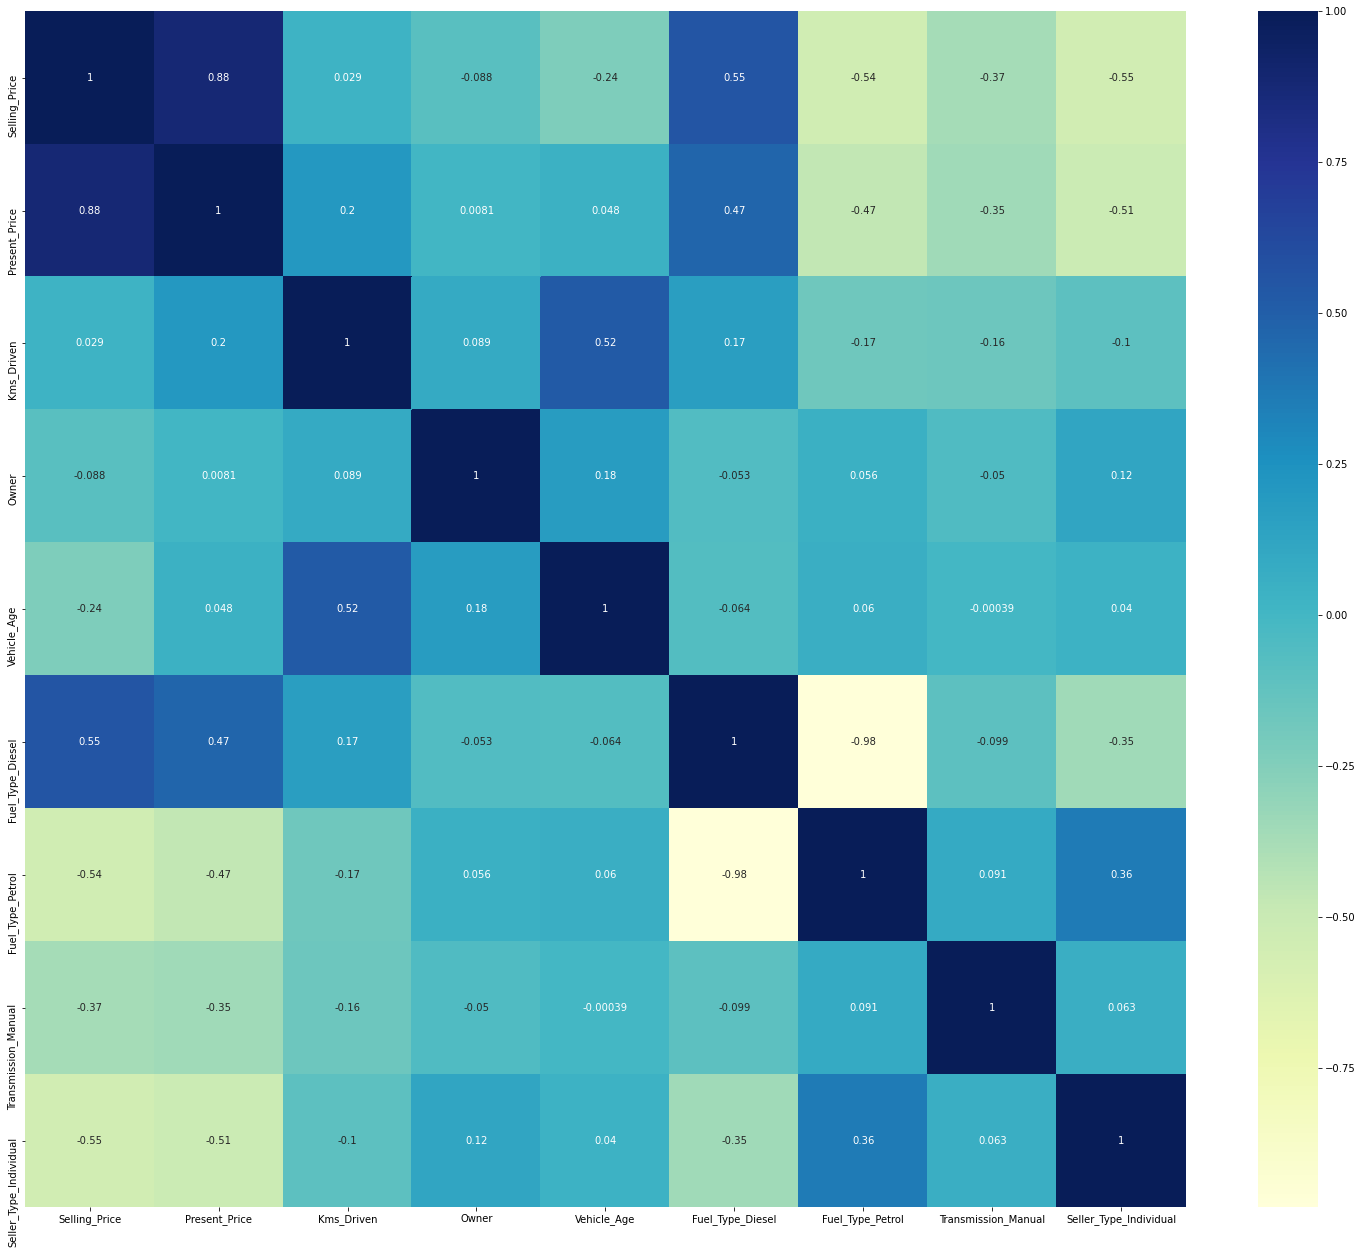

In [12]:
#create correlation matrix
correlations = dataset.corr()
indx=correlations.index

#plot this correlation for clear visualisation
plt.figure(figsize=(26,22))
#annot = True , dsiplays text over the cells.
#cmap = "YlGnBu" is nothing but adjustment of colors for our heatmap
sns.heatmap(dataset[indx].corr(),annot=True,cmap="YlGnBu")
#amount of darkness shows how our features are correalated with each other 


#### I have skipped the EDA part as the main idea is to create the ml model.
#### Try to do some visualizations, in order to understand the features of this dataset.

### Features and target variable

In [11]:
# taking all the features except "selling price"
X=dataset.iloc[:,1:]
# taking "selling price" as y , as it is our target variable
y=dataset.iloc[:,0]


### Feature Importance

In [12]:
#checking and comparing the importance of features
from sklearn.ensemble import ExtraTreesRegressor
#creating object
model = ExtraTreesRegressor()
#fit the model
model.fit(X,y)

print(model.feature_importances_)

[0.39016114 0.038594   0.00047081 0.07820798 0.22829033 0.01261028
 0.1264919  0.12517356]


NameError: name 'plt' is not defined

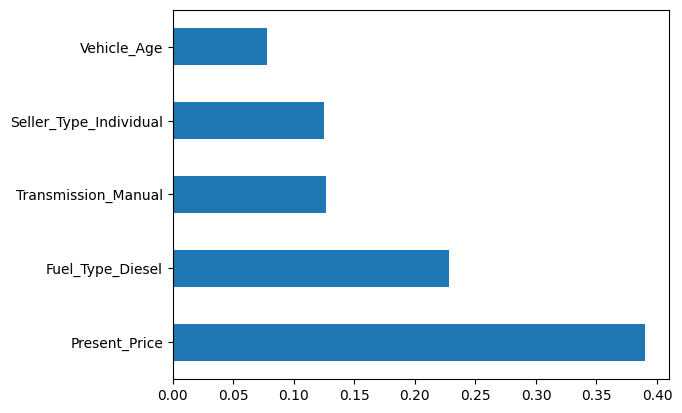

In [13]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# considering top 5 important features
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


### Splitting data into training and testing

In [14]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting and evaluating different models
Here I am using three models :
1. Linear Regression
2. Decision Tree
3. Random forest Regressor

I will fit these models and then choose one with the better accuracy.
You can use any regression model as per your choice.

## Linear Regression Model

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

#creating object for linear regression
reg=LinearRegression()
#fitting the linear regression model
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

#metrics
from sklearn import metrics
#print mean absolute error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print mean squared error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print the root mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print R2 metrics score
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 1.2426713915033705
MSE: 4.432128265667618
RMSE: 2.105262042043132
R2: 0.8517983059778264


## Decision tree Model

In [17]:
from sklearn.tree import DecisionTreeRegressor

#creating object for Decision tree
tree = DecisionTreeRegressor()

#fitting the decision tree model
tree.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = tree.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.8567032967032966
MSE: 2.5176263736263738
RMSE: 1.5867029884721253
R2: 0.9158155019166334


## Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

#creating object for Random forest regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#fitting the rf model
rf.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = rf.predict(X_test)

#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7619032967032967
MSE: 2.6603794010988984
RMSE: 1.63106695175241
R2: 0.911042120094157


#### We want our R2 score to be maximum and other errors to be minimum for better results

### Random forest regressor is giving better results. therefore we will hypertune this model and then fit, predict.

# Hyperparamter tuning

In [19]:
#n_estimators = The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [20]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [21]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [23]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [24]:
#fit the random forest model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

c:\Users\karuppasamy.v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\karuppasamy.v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\karuppasamy.v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\karuppasamy.v\AppData\Local\Programs\Python\Python31

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
#displaying the best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [26]:
rf_random.best_score_

-4.077882842540904

# Final Predictions

In [27]:
#predicting against test data
y_pred=rf_random.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.9947892789277266
MSE: 4.722651305666011
RMSE: 2.1731661937518747
R2: 0.8420837841726349


In [29]:
y_pred

array([ 7.29439881,  0.53397093,  5.32442952,  9.6173097 , 14.51374797,
        5.15841843,  3.51875411,  0.72719938,  4.74328687,  4.61169692,
        3.13138444,  0.80695404,  5.08637339,  8.10019956,  8.07024353,
        9.95996447,  7.77539552,  4.1682567 ,  0.52320144,  1.42705066,
        3.93763359,  4.63305333,  5.791082  ,  9.11453252,  0.31678723,
        0.75885978,  0.55763121,  0.67332741,  0.53029507,  4.7366547 ,
        5.78284359,  5.80156788,  0.51517841,  9.63393938,  3.49460169,
        1.22842078,  5.74751938,  7.51563705,  0.30821294,  8.70264167,
        9.63111508, 18.73280822,  5.08358851,  4.03512004,  5.49842205,
       11.659491  ,  0.36031406,  0.89834639,  4.91602736,  8.86140709,
        7.16778732,  3.917018  ,  4.86599906, 19.76038774,  1.13745085,
        1.05481247,  0.53889897,  2.76720982,  3.70797481,  1.21958768,
        4.03544408,  7.99504903,  3.21856341, 19.72777973,  4.20586206,
        5.47788589, 10.05459291,  4.70684666,  0.5464407 ,  3.08

In [28]:
#predicting against test data
y_pred=rf_random.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7782640649846699
MSE: 2.6415112097526117
RMSE: 1.62527265704946
R2: 0.9116730354813118


# Save the model

In [28]:
import pickle
# open a file, where you ant to store the data
file = open('car_price_model.bin', 'wb')

# dump information to that file
pickle.dump(rf_random, file)